In [1]:
from neuron import h
import numpy as np
h.load_file('stdrun.hoc')
import matplotlib.pyplot as plt

In [2]:
h.load_file("template.hoc")
burster = h.Burster()

In [15]:
# CI
ci = h.IClamp(burster.soma[0](0.5))
ci.amp = 1.5
ci.delay = 200
ci.dur = 1000

# V recording
v = h.Vector().record(burster.soma[0](0.5)._ref_v)

In [16]:
h.tstop = 1200
h.dt = 0.025
h.v_init = -50

In [17]:
h.run()

0.0

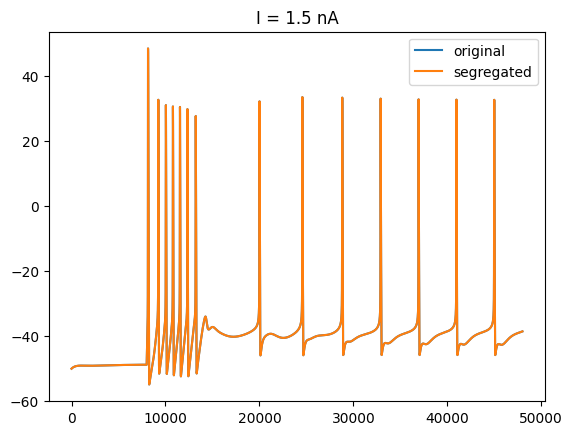

In [18]:
v_orig = np.loadtxt("orig_15na.txt")
plt.plot(v_orig, label = "original")
plt.plot(v.as_numpy(), label = "segregated")
plt.title("I = 1.5 nA")
plt.legend()

# Segregation

In [12]:
v = np.linspace(-80, 0, 1000)

# Activation curves from the original modfiles
na = 1.0/(1.0+ (np.exp((v+25.5)/(-5.29))))
kdr = 1.0/(1.0 + (np.exp((v+12.3)/(-11.8))))
ka = 1.0/(1.0+(np.exp((v+27.2)/(-8.7))))
cat = 1.0/(1.0+ (np.exp((v+27.1)/(-7.2))))
cas = (1.0)/(1+ (np.exp ((v+33.0)/(-8.1))))

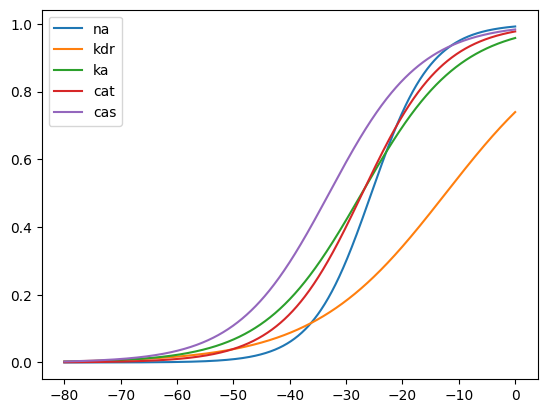

In [13]:
plt.plot(v, na, label = 'na')
plt.plot(v, kdr, label = 'kdr')
plt.plot(v, ka, label = 'ka')
plt.plot(v, cat, label = 'cat')
plt.plot(v, cas, label = 'cas')
plt.legend()

In [ ]:
# SEGREGATION VALUES

# V < -60: Leak, KCa, CaPool are active
# -60 < V < -55: + KA, CaT, CaS are active
# V > -55: + Na, Kdr are active